In [2]:
!pip install ultralytics -q
!pip install roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.0 MB/s eta 0:00:00


In [3]:
import os
import cv2

from roboflow import Roboflow
from ultralytics import YOLO
from pathlib import Path

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from google.colab import userdata
rf_api = userdata.get('rf_api')

In [9]:
roboflow = Roboflow(rf_api)
project = roboflow.workspace("petprojects-tapwg").project("tongue-3vaud-7h2pu")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to tongue-2 in yolov11:: 100%|██████████| 865/865 [00:00<00:00, 7201.89it/s]


In [10]:
data_yaml = '/content/tongue-2/data.yaml'

In [11]:
model = YOLO("yolo11n.pt")

In [12]:
results = model.train(epochs=25, data=data_yaml, imgsz=640)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tongue-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

In [14]:
val_results = model.val(data=data_yaml)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1366.7±481.0 MB/s, size: 62.7 KB)
val: Scanning /content/tongue-2/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 23/23 47.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.7it/s 1.1s
                   all         23         66      0.913       0.92      0.963        0.6
                Tongue         16         16      0.872          1      0.985       0.69
                  face         21         50      0.953       0.84      0.942      0.509
Speed: 9.2ms preprocess, 16.0ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to /content/runs/detect/train22


In [15]:
model.save("/content/yolov11_tongue_face_v1.pt")

In [18]:
import matplotlib.pyplot as plt


image 1/1 /content/images/photo_2.jpg: 480x640 1 Tongue, 1 face, 10.7ms
Speed: 2.0ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


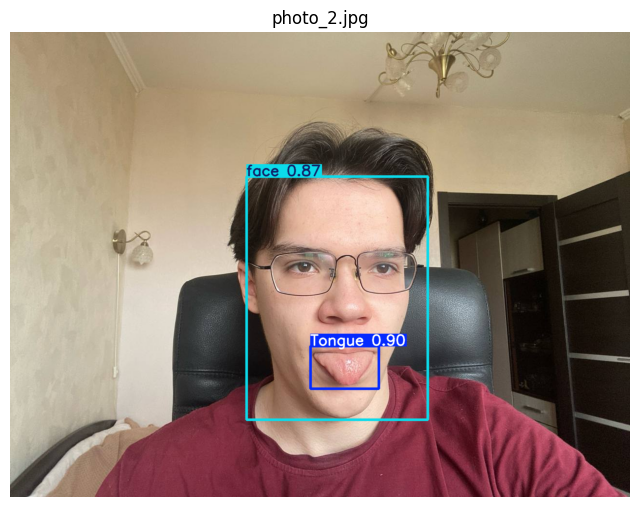


image 1/1 /content/images/photo_1.jpg: 480x640 1 face, 12.0ms
Speed: 2.5ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


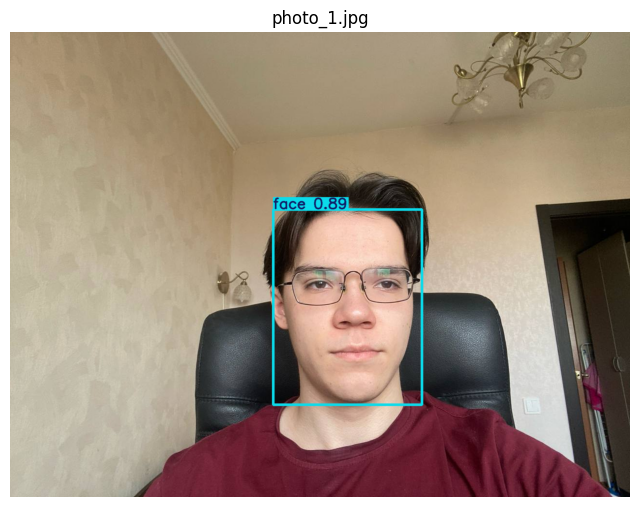

In [24]:
images_dir = Path('/content/images')
img_paths = list(images_dir.glob('*.jpg'))

for img_path in img_paths:
  result = model.predict(source=str(img_path), conf=0.5, iou=0.5)

  for res in result:
    result_image = res.plot()
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(result_image)
    plt.axis('off')
    plt.title(img_path.name)
    plt.show()

In [28]:
model.predict(source='/content/videos/Face_tongue_vid_1.mp4', save=True, conf=0.5)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/278) /content/videos/Face_tongue_vid_1.mp4: 448x640 1 face, 57.9ms
video 1/1 (frame 2/278) /content/videos/Face_tongue_vid_1.mp4: 448x640 1 face, 10.3ms
video 1/1 (frame 3/278) /content/videos/Face_tongue_vid_1.mp4: 448x640 1 face, 14.3ms
video 1/1 (frame 4/278) /content/videos/Face_tongue_vid_1.mp4: 448x640 1 face, 10.6ms
video 1/1 (frame 5/278) /content/videos/Face_tongue_vid_1.mp4: 448x640 1 face, 11.2ms
video 1/1 (frame 6/278) /c

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Tongue', 1: 'face'}
 obb: None
 orig_img: array([[[155, 168, 171],
         [155, 168, 171],
         [155, 168, 171],
         ...,
         [137, 162, 183],
         [140, 167, 188],
         [140, 167, 188]],
 
        [[155, 168, 171],
         [155, 168, 171],
         [155, 168, 171],
         ...,
         [137, 162, 183],
         [140, 167, 188],
         [140, 167, 188]],
 
        [[155, 168, 171],
         [155, 168, 171],
         [155, 168, 171],
         ...,
         [137, 162, 183],
         [139, 166, 187],
         [139, 166, 187]],
 
        ...,
 
        [[ 58,  65,  71],
         [ 58,  65,  71],
         [ 58,  65,  71],
         ...,
         [188, 201, 209],
         [188, 201, 209],
         [188, 201, 209]],
 
        [[ 52,  59,  65],
         [ 52,  59,  65],
         [ 52,  59,  65],
         ...,
       

In [31]:
from IPython.display import Video

!ffmpeg -i runs/detect/train23/Face_tongue_vid_1.avi -c:v libx264 -preset fast -crf 23 output_video.mp4
Video("output_video.mp4", embed=True, width=800)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab